In [53]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np

In [6]:
stem = '/Users/bandari/Documents/git.repos/GLINT_reduction_v3/data/'

In [25]:
def read_fits_file(file_path):
    try:
        hdul = fits.open(file_path)
        # Access the data or header information
        data_array = hdul[0].data
        hdul.close()
    except Exception as e:
        print("Error reading FITS file:", str(e))

    return data_array

In [46]:
test = read_fits_file(stem + 'sample_data_3_spec.fits')
test_1_slice = test[0,:,:]

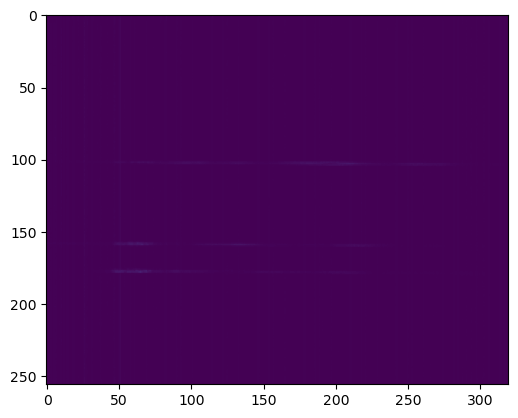

In [27]:
plt.imshow(test[1,:,:])
plt.show()

In [77]:
class Extractor:
    def __init__(self, array):
        self.array = array

    def rectangle(self, start_x, start_y, end_x, end_y):
        self.rectangle = self.array[start_y:end_y, start_x:end_x]

    def sum_along_axis(self, axis):
        return np.sum(self.rectangle, axis=axis)
    
    def plot_1d_array(self, array1):
        plt.plot(array1)
        plt.show()
    
    def plot_2d_array_with_rectangle(self, array2, start_x, start_y, end_x, end_y):
        plt.imshow(array2, origin='lower')
        plt.plot([start_x, start_x, end_x, end_x, start_x], [start_y, end_y, end_y, start_y, start_y], 'r')
        plt.show()

    

In [38]:
np.shape(test_1_slice)

(256, 320)

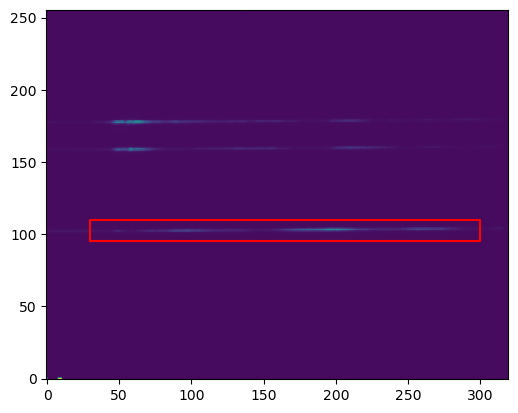

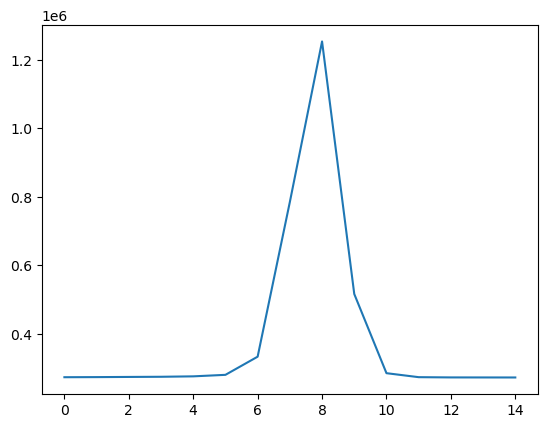

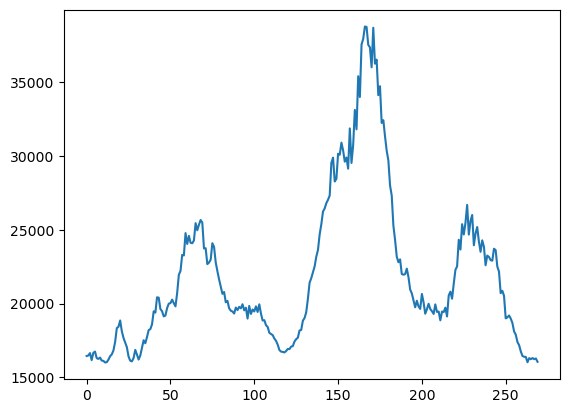

Sum along x-axis: [ 272987.42395238  273294.49919048  273805.07542857  274281.8742381
  275525.24580952  279929.0767619   332951.243       784578.62709524
 1253296.96257143  515979.377       284762.90785714  273128.50628571
  272399.99409524  272306.98242857  272229.0677619 ]
Sum along y-axis: [16453.94519048 16486.80157143 16651.21990476 16175.00014286
 16670.77052381 16753.20785714 16307.98609524 16257.27838095
 16346.26809524 16140.55104762 16125.22280952 16015.30195238
 16032.33371429 16208.6562381  16439.69857143 16566.13633333
 16832.88661905 17411.61704762 18340.61014286 18435.88480952
 18860.48795238 18122.42685714 17675.76914286 17366.46780952
 17049.46571429 16416.34361905 16137.0052381  16090.86661905
 16313.54628571 16867.40895238 16558.66971429 16213.55395238
 16488.70557143 17001.90480952 17519.4932381  17315.41080952
 17730.33538095 18210.65190476 18271.85557143 18596.71919048
 19478.63828571 19390.78161905 20428.422      20403.849
 19635.87190476 19483.36238095 19136.13

In [80]:
# Create an instance of the Extractor class using the test_1_slice variable
extractor = Extractor(test_1_slice)

# Define the coordinates for the rectangle
start_x = 30
start_y = 95
end_x = 300
end_y = 110

# Call the rectangle method of the Extractor instance
extractor.rectangle(start_x, start_y, end_x, end_y)

# Call the sum_along_axis method of the Extractor instance
sum_along_x = extractor.sum_along_axis(axis=0)
sum_along_y = extractor.sum_along_axis(axis=1)

# Plot the array with the rectangle
extractor.plot_2d_array_with_rectangle(test_1_slice, start_x, start_y, end_x, end_y)

extractor.plot_1d_array(sum_along_x)
extractor.plot_1d_array(sum_along_y)


# Print the results
print("Sum along x-axis:", sum_along_x)
print("Sum along y-axis:", sum_along_y)
